# Theory/Computation Problems

### Problem 1 (20 points) 
Show that the stationary point (zero gradient) of the function
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

### Problem 2 (50 points) 

* (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

* (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
* (5 points) In what conditions will $f(g(x))$ be convex?

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 

# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

* (5 points) Formulate this problem as an optimization problem. 
* (5 points) Is your problem convex?
* (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
* (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?

In [110]:
## imports used in other cells
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time

# Problem 1
The given function of 
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
has a gradient g of 
$$
\begin{aligned}
    g=\begin{bmatrix}
    4x_{1} - 4x_2 \\
    -4x_1 + 3 x_2 + 1 
    \end{bmatrix}
\end{aligned}
$$
Setting this equal to the zero vector to find the stationary point, we see
$$
\begin{aligned}
    g=\begin{bmatrix}
    4x_{1} - 4x_2 \\
    -4x_1 + 3 x_2 + 1 
    \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} \to 
    x_1 = x_2 \to -4x_1 + 3x_1 + 1 = 0 \to x_1 = 1
\end{aligned}
$$
which means the stationary point is at $ x_0 = (1, 1)$.

Computing the Hessian, H, we find
$$
    \begin{aligned}
    H=\begin{bmatrix}
    4 & -4 \\
    -4 & 3
    \end{bmatrix}
\end{aligned}
$$
which we can then find the two eigenvalues of $\lambda_1 = -0.53113$ and $\lambda_2 = 7.53113$.

Since the eigenvalues have a mix of positive and negative signs, this implies that the Hessian is indefinite and the stationary point of $x_0 = (1, 1)$ is also a saddle point.

To find the directions of downslopes away from the saddle, we start by taking a second order Taylor's expansion about the saddle point.
$$
\begin{aligned}
    f(x) \approx f(x_0) + g(x_0)^T (x - x_0) + \frac{1}{2} (x - x_0)^T H(x_0) (x - x_0) = f(x_0) + \frac{1}{2} (x - x_0)^T H(x_0) (x - x_0)
\end{aligned}
$$
Then the directions of downslopes away from the saddle correspond to values of x where $f(x) - f(x_0) < 0$, so rearranging we find that to be
$$
    f(x) - f(x_0) = \frac{1}{2} (x - x_0)^T H(x_0) (x - x_0) < 0
$$
and we can evaluate this as 
$$
    \frac{1}{2} (x - x_0)^T H(x_0) (x - x_0) =
    1/2 \begin{bmatrix} x_1 - 1  &  x_2 - 1 \end{bmatrix} 
    \begin{bmatrix} 4 & -4 \\ -4 & 3 \end{bmatrix} 
    \begin{bmatrix} x_1 - 1 \\ x_2 - 1 \end{bmatrix} = 
$$
$$
    \frac{1}{2}((4(x_1 - 1) - 4(x_2-1))(x_1 - 1) + (-4(x_1 - 1) - 3(x_2-1))(x_2 - 1) = 4(x_1 - 1)^2 - 8(x_1-1)(x_2-1) + 3(x_2 - 1)^2) = 
$$
$$
    4 x_1^2 + 3 x_2^2 - 8 x_1 x_2 + 2 x_2 - 1 < 0
$$
Therefore the set 
$$
    \{x_1, x_2 | 4 x_1^2 + 3 x_2^2 - 8 x_1 x_2 + 2 x_2 < 1, x_1^2 + x_2^2 = 1\}
$$
point in directions of downslopes away from the saddle. The second condition just normalizes the set to only give unit directions. 

In [111]:
## Problem 1 Code

H = np.array([[4, -4], [-4, 3]])
print("Hessian: " + str(H)) # check it's defined properly

w, v = np.linalg.eig(H)

print("Eigenvalues of H: " + str(w))


Hessian: [[ 4 -4]
 [-4  3]]
Eigenvalues of H: [ 7.53112887 -0.53112887]


# Problem 2


## Part 1 
Take $\hat{n}$ to be the unit normal vector to plane $E = (t, u, v, s) = (1, 2, 3 -1)$, calculated as
$$
    \hat{n} = \frac{(t, u, v)}{\sqrt{t^2 + u^2 + v^2)}}
$$
The perpendicular distance from the origin to plane $E$ is known to be
$$
    \text{d} = \frac{-s}{\sqrt{t^2 + u^2 + v^2)}}
$$
Then the point $p_a$ with coordinates $p_a = d \cdot \hat{n}$ would be a point on the plane that is closest to the origin. The position vector $p - p_a$ would correspond to the vector from $p_a$ to $p$. The projection of $p - p_a$ onto $\hat{n}$ would give the vector normal to the plane to the point $p$, call it $\text{proj}_{\hat{n}}(p - p_a)$. Then the vector to the point $p_b$ on the plane that is closest to $p$ is 
$$
p_b = p - \text{proj}_{\hat{n}}(p - p_a)
$$

Computing this using the code below, we find that 
$$
    p_b = p - \text{proj}_{\hat{n}}(p - p_a) = \begin{bmatrix} -1.07142857 & -0.14285714 & 0.78571429 \end{bmatrix}^T
$$

Which as we will see agrees with the results from Part 2.

## Part 2

We can define the cost function as the distance between some point $p$ on the plane $E$ and the point $p^* = (-1, 0, 1)$. This can be expressed formally as 
$$
\begin{aligned}
    \min_{p} \quad & \lVert p^* - p \rVert_2^2 = (p^* - p)^T \cdot (p^{*} - p) \\
    \text{s.t.}\quad & p_1 + 2p_2 + 3p_3 = 1
\end{aligned}
$$

Alternatively the equality constraint can be used to rearrange the problem into a $2$-dimensional unconstrainted minimization problem as

$$
\begin{aligned}
    \min_{p_2, p_3} \quad & (-1 - (1 - 2 p_2 - 3 p_3))^2 + (-p_2)^2 + (1 - p_3)^2 = (2 p_2 + 3 p_3 - 2)^2 + p_2^2 + (1 - p_3)^2\\
\end{aligned}
$$

Denoting the cost function as $f(p_2, p_3)$, we compute the gradient as 

$$
\begin{aligned}
    g(p_2, p_3) = \nabla f(p_2, p_3) = 
    \begin{bmatrix}
        2 (2p_2 + 3p_3 - 2)(2) + 2 p_2 \\
        2 (2p_2 + 3p_3 - 2)(3) + 2 (1 - p_3)(-1)
    \end{bmatrix} = 
    \begin{bmatrix}
        10p_2 + 12p_3 - 8 \\
        12p_2 + 20p_3 - 14
    \end{bmatrix}
\end{aligned}
$$

and similarly the Hessian as
$$
\begin{aligned}
    H(p_2, p_3) = \nabla^2 f(p_2, p_3) = 
    \begin{bmatrix}
        10 & 12 \\
        12 & 20
    \end{bmatrix} 
\end{aligned}
$$

See the code below for the implimentation as well as the discussion after the code cells. 

In [112]:
## Problem 2 Part 1 Code

# definitions from above


def closest_point(p, n, s):
    n_hat = n / np.linalg.norm(n)
    perp_dist = -s / np.sqrt(n[0]**2 + n[1]**2 + n[2]**2)
    p_a = perp_dist * n_hat
    p_diff = p - p_a

    v_proj = np.dot(p_diff, n_hat) / np.dot(n_hat, n_hat) * n_hat
    p_b = p - v_proj
    return p_b

p = np.array([-1, 0, 1])
n = np.array([1, 2, 3])
s = -1

print("The point on plane E closest to p is:")
print(closest_point(p, n, s))

The point on plane E closest to p is:
[-1.07142857 -0.14285714  0.78571429]


In [113]:
## Problem 2 Part 2 Code
# function defs used later -0.14285714  0.78571429
def cost(p):
    p_2 = p[0]
    p_3 = p[1]
    cost_val = (2 * p_2 + 3 * p_3 - 2)**2 + (-p_2)**2 + (1 - p_3)**2
    return cost_val

def grad(p):
    p_2 = p[0]
    p_3 = p[1]
    grad_val_1 = 10 * p_2 + 12 * p_3 - 8
    grad_val_2 = 12 * p_2 + 20 * p_3 - 14
    return np.array([grad_val_1, grad_val_2])

def hessian(p):
    H = np.array([[10, 12], [12, 20]])
    return H # unneccary to put as a function, I know, but I like the consistancy

# for gradient descent
def line_search_phi(p, params):
    #phi = cost(p) - params['a'] * params['t'][0] * np.dot(grad(p), grad(p))
    phi = cost(p) - params['a'] * np.dot(params['t'], grad(p))
    return phi
    
def line_search(p, params):
    a = params['a']
    i = 0
    while line_search_phi(p, params) < cost(p - a * grad(p)):
        a = 0.5 * a
        i = i + 1

        if params['debug_verbose']:
            print("line_search_phi: " + str(line_search_phi(p, params)) + ", cost: " + str(cost(p - a * grad(p))) + ", a: " + str(a))
            print("p: " + str(p) + "grad: " + str(grad(p)))

        if(params['max_i'] < i):
            if params['verbose']:
                print("!!Iteration limit reached in line_search, returning a of " + str(a) + "!!")
                print("line_search_phi: " + str(line_search_phi(p, params)) + ", cost: " + str(cost(p - a * grad(p))) + ", a: " + str(a))
            return a
    return a

def grad_descent(p, params):
    sln_list = [p]
    error = np.linalg.norm(grad(p))
    error_list = [error]
    i = 0
    while params['eps'] <= error:
        a = line_search(p, params)
        p = p - a*grad(p)
        error = np.linalg.norm(grad(p))

        sln_list.append(p)
        error_list.append(error)
        i = i + 1
        if(params['max_i'] < i):
            if params['verbose']:
                print("!!Iteration limit reached in gradient descent main loop, breaking!!")
            break
    return sln_list, error_list, i

# for newton's method
def newtons_method(p, params):
    sln_list = [p]
    error = np.linalg.norm(grad(p))
    error_list = [error]
    i = 0
    while params['eps'] <= error:
        p = p - params['a']*np.matmul(np.linalg.inv(hessian(p)), grad(p))
        error = np.linalg.norm(grad(p))

        sln_list.append(p)
        error_list.append(error)
        i = i + 1
        if(params['max_i'] < i):
            if params['verbose']:
                print("!!Iteration limit reached in newton's method main loop, breaking!!")
            break
    return sln_list, error_list, i


Gradient Descent Results:
Starting value: [0. 0.]
i: 41
Final error: 0.0053634716081218895
Final value: [-0.14154998  0.78503573]
Gradient Descent Results:
Starting value: [1. 0.]
i: 24
Final error: 0.0016079016446986065
Final value: [-0.14282529  0.78576207]
Gradient Descent Results:
Starting value: [0. 1.]
i: 23
Final error: 0.0016079016446986065
Final value: [-0.14282529  0.78576207]
Gradient Descent Results:
Starting value: [1. 1.]
i: 43
Final error: 0.004906998133052869
Final value: [-0.14152898  0.78467545]
Gradient Descent Results:
Starting value: [-1. -1.]
i: 37
Final error: 0.005531436506034991
Final value: [-0.14135644  0.78490111]
Gradient Descent Results:
Starting value: [  7. -10.]
i: 61
Final error: 0.00536002879381175
Final value: [-0.14162447  0.78509015]
GD Ran in 0.02145242691040039 seconds.


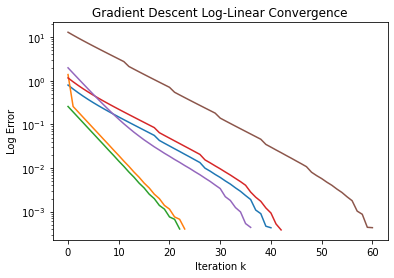

In [114]:
## gradient descent results

params_grad = {'a' : 1.0, 't' : np.array([0.0001, 0.0001]), 'eps' : 0.006, 'max_i' : 10000, 'verbose' : True, 'debug_verbose' : False}

p_list = [np.array([0.0, 0.0]), np.array([1.0, 0.0]), np.array([0.0, 1.0]), np.array([1.0, 1.0]), np.array([-1.0, -1.0]), np.array([7.0, -10.0])]

time_grad = 0.0
for p in p_list:
    start = time.time()
    sln_list, error_list, i = grad_descent(p, params_grad)
    end = time.time()
    time_grad = time_grad + (end - start)
    
    print("Gradient Descent Results:")
    print("Starting value: " + str(p))
    print("i: " + str(i))
    print("Final error: " + str(error_list[-1]))
    print("Final value: " + str(sln_list[-1]))
    k_iter = [i for i in range(i)]
    log_con = [(np.linalg.norm(sln_list[k] - sln_list[-1])) for k in range(i)]
    plt.semilogy(k_iter, log_con)

plt.xlabel("Iteration k")
plt.ylabel("Log Error")
plt.title("Gradient Descent Log-Linear Convergence")
print("GD Ran in " + str(time_grad) + " seconds.")

Newton's Method Results:
Starting value: [0. 0.]
i: 75
Final error: 0.005965885060512921
Final value: [-0.14280429  0.78542358]
Newton's Method Results:
Starting value: [1. 0.]
i: 59
Final error: 0.005647458528586848
Final value: [-0.14057523  0.78414547]
Newton's Method Results:
Starting value: [0. 1.]
i: 68
Final error: 0.005578177295841158
Final value: [-0.14274664  0.78588005]
Newton's Method Results:
Starting value: [1. 1.]
i: 79
Final error: 0.005535539033628593
Final value: [-0.14257971  0.7857663 ]
Newton's Method Results:
Starting value: [-1. -1.]
i: 87
Final error: 0.005738706183281727
Final value: [-0.14294671  0.78552769]
Newton's Method Results:
Starting value: [  7. -10.]
i: 96
Final error: 0.005762931992487936
Final value: [-0.14256797  0.78527764]
NM Ran in 0.019117116928100586 seconds.


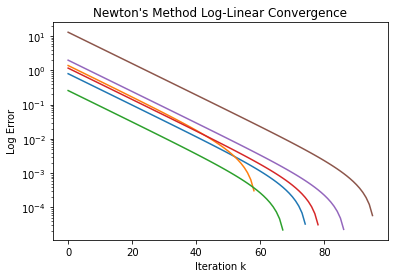

In [115]:
## Newton's method results

params_newton = {'a' : 0.1, 't' : np.array([0.0001, 0.0001]), 'eps' : 0.006, 'max_i' : 10000, 'verbose' : True, 'debug_verbose' : False}

time_newton = 0.0
for p in p_list:
    start = time.time()
    sln_list, error_list, i = newtons_method(p, params_newton)
    end = time.time()
    time_newton = time_newton + (end - start)
    print("Newton's Method Results:")
    print("Starting value: " + str(p))
    print("i: " + str(i))
    print("Final error: " + str(error_list[-1]))
    print("Final value: " + str(sln_list[-1]))
    k_iter = [i for i in range(i)]
    log_con = [(np.linalg.norm(sln_list[k] - sln_list[-1])) for k in range(i)]
    plt.semilogy(k_iter, log_con)

plt.xlabel("Iteration k")
plt.ylabel("Log Error")
plt.title("Newton's Method Log-Linear Convergence")
print("NM Ran in " + str(time_newton) + " seconds.")


## Part 2 Results Discussion
As can be seen from the output of the functions and log-linear convergence plot, all tested initial values converge to the correct point of $\begin{bmatrix} -1.07142857 & -0.14285714 & 0.78571429 \end{bmatrix}^T$ within the error bounds with expected convergence rates. The tested initial values were $(0.0, 0.0)$, $(1.0, 0.0)$, $(0.0, 1.0)$, $(1.0, 1.0)$, $(-1.0, -1.0)$, and $(7.0, -10.0)$. The initial values were chosen mostly by random, but the last tested case was chosen to try a point I thought was probably decently far from the correct value. 

The results from the gradient descent show that it converges in fewer iterations than the Newton's method implimentation. However, the total run time of Newton's Method was only around $0.023$ seconds compared to the $0.022$ seconds for gradient descent (when I ran it last these were the time). This is of course dependent the computer running the code and different metaparameters I selected, but it seems that the simpler computational complexity of Newton's method allows for similar speed results given these parameters, implimentation, and computer dispite needing roughly 20 to 40 more iterations to reach accepted bounds.

Another observation is that this gradient descent implimentation would take a very long time to converge if the error bounds were too aggressive. When debugging it seemed that the norm of the gradient would quickly converge to roughly $0.005$ in basically all cases, but it couldn't get higher accuracy without hitting the max iteration limit (added to avoid possible infinte loops). The Newton's method implimentation did not have this issue and would converge for tighter bounds, but I used the same bounds to compare them more equally.

# Problem 3

## Part 1
For the first question, we can use the definition of a convex function to check if their (positive) weighted sum is also convex to get the inequality 
$$
a f(\lambda x_1 + (1-\lambda) x_2) + b g(\lambda x_1 + (1-\lambda) x_2) \leq a \lambda f(x_1) + a (\lambda - 1) f(x_2) + b \lambda g(x_1) + b (\lambda - 1) g(x_2)
$$
This can be rearranged into
$$
a f(\lambda x_1 + (1-\lambda) x_2) + b g(\lambda x_1 + (1-\lambda) x_2) \leq a (\lambda f(x_1) +  (\lambda - 1) f(x_2)) + b (\lambda g(x_1) + (\lambda - 1) g(x_2))
$$
We see that the condition of $f(\lambda x_1 + (1-\lambda) x_2) \leq \lambda f(x_1) +  (\lambda - 1) f(x_2)$ and similar for $g(x)$ is simply weigthed by $a$ and $b$ respectively. Since $f(x)$ and $g(x)$ are known to be convex, these conditions hold seperately as the weights can be divided out, or
$$
a f(\lambda x_1 + (1-\lambda) x_2) \leq a \lambda f(x_1) +  (\lambda - 1) f(x_2) \implies f(\lambda x_1 + (1-\lambda) x_2) \leq \lambda f(x_1) +  (\lambda - 1) f(x_2)
$$
meaning the strictly positive weights $a$ and $b$ do not alter the convexity of $f(x)$ and $g(x)$ individually. 

Furthermore, since $a f(x)$ and $b g(x)$ are convex, we can add their inequalities to see that their sum is also convex as the inequality is not altered.
$$
[a f(\lambda x_1 + (1-\lambda) x_2)] + [b g(\lambda x_1 + (1-\lambda) x_2)] \leq [a (\lambda f(x_1) +  (\lambda - 1) f(x_2))] + [b (\lambda g(x_1) + (\lambda - 1) g(x_2))]
$$

Therefore, the weights $a$ and $b$ do not alter the convexity of $f(x)$ or $g(x)$ individually which implies that the sum $a f(x) + b g(x)$ satisifies the inequality condition for convexity as it is not altered by adding the two individual inequalities which then implies $af(x) + b g(x)$ is convex. 

## Part 2
If we write $h(x) = f(g(x))$ and consider its gradient and Hessian, we can find that
$$
    \frac{\partial h (x)}{\partial x_i} = \frac{\partial f (g(x))}{\partial x_i} \frac{\partial g (x)}{\partial x_i} 
$$
and
$$
    \frac{\partial h (x)}{\partial x_i \partial x_j} = \frac{\partial^2 f (g(x))}{\partial x_i \partial x_j} \frac{\partial g (x)}{\partial x_i} \frac{\partial g (x)}{\partial x_j} + 
    \frac{\partial f (g(x))}{\partial x_i} \frac{\partial^2 g (x)}{\partial x_i \partial x_j}
$$
with the indicies $i, j$ representing each term in the gradient and Hessians similar to Einstein summation convention for tensors. 

Since $f(x)$ and $g(x)$ are both convex, that implies that the individual terms $\frac{\partial^2 f (g(x))}{\partial x_i \partial x_j}$ and $\frac{\partial^2 g (x)}{\partial x_i \partial x_j}$ would from postive semi-definite Hessians. This leaves conditions on the various gradients determining the sign of each term which may alter the Hessian to be not positive semi-definite. If the sign of $\frac{\partial g (x)}{\partial x_i}$ and $\frac{\partial g (x)}{\partial x_j}$ are the same, the first term would keep its sign. If $\frac{\partial f (g(x))}{\partial x_i}$ is positive, the second term would keep its sign. Both of these conditions would ensure the Hessian of $f(g(x))$ to be positive semi-definite and would therefore make $f(g(x))$ convex.

# Problem 4
Not worked, sadly.

# Problem 5

## Part 1
Since the objective is to keep the minimize the difference between the $I$ and $a_k^T p$ by adjusting $p$, we can write this as an unconstrained optimization problem as
$$
\begin{aligned}
    \min_{p} \quad \Sigma_{k=1}^m (a_k^T p - I)^2
\end{aligned}
$$

## Part 2
The problem is convex if the Hessian is positive semi-definite or strictly convex if positive definite, so checking the eigenvalues of the Hessian of the cost function can show this. 

Starting with a single $k$ mirror of the cost function, we see the gradient as
$$
    g_k = \nabla (a_k^T p - I)^2 = 2 (a_k p - I) a_k^T
$$
Then the Hessian is the gradient of the gradient, or
$$
    H_k = \nabla g = \nabla 2 (a_k p - I) a_k^T = 2 a_k a_k^T
$$
Since each term in the summation of the cost function is entirely seperable, we have
$$
    H = \Sigma_{k=1}^m H_k = \Sigma_{k=1}^m 2 a_k a_k^T
$$
Note that the physical meaning of $a_k$ being a $1 \times n$ vector of distances and because distances are non-negative (strictly positive if you assume the lamp and the mirror aren't in the exact same location, which is realistic), all the elements of each $a_k$ would also be non-negative so the Hessian is at least positive semi-definite and therefore the problem would at least be convex, although not strictly convex in general. To show this, consider the case where there's two lamps and one mirror. Then the actual intensity on the mirror would be $a^T p = a_{1,1} p_1 + a_{1,2} p_2 = I_a$. In this case, either lamp or a combination of them could supply the entire target intensity perfectly and therefore there is no unique solution. No unique solution suggests the problem is not strictly convex in general. 

## Part 3
No, it would not ensure a unique solution for a general case. Using the above example of the two lamps and one mirror, if $p^*$ is large enough then the same situation occurs where $a^T p = a_{1,1} p_1 + a_{1,2} p_2 = I_a \approx I_t$ for multiple possible sets of $p$ as it would effectvely behave as if the constraint was not there. This one exception means that there is not a unique solution in general, although there may be a unique solution in other cases.

## Part 4
No, this would also not ensure a unique solution. Instead of two lamps and one mirror, consider four lamps and one mirror. The constraint of half the lamps be on then reduces the problem back to the first case of two lamps and one mirror, but now there are even more solutions once you consider the possible permutations of lamps that would be powered. 
